In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('datasets_33180_43520_heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
x = data.drop('target', axis = 1)
y = data['target']
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [38]:
rs = np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = rs, test_size = 0.33)

In [62]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x, y)
parametrs = {'n_estimators' : [10], 'max_depth' : [5]}
grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,  cv = 5)

In [60]:
grid_search_cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [50]:
best_clf = grid_search_cv_clf.best_estimator_

In [51]:
best_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
best_clf.score(x_test, y_test)

0.81

In [54]:
best_clf.feature_importances_

array([0.04809742, 0.0812315 , 0.19146521, 0.06048271, 0.04301468,
       0.00628515, 0.01359645, 0.09466282, 0.05176692, 0.15191639,
       0.04457275, 0.10675061, 0.10615739])

In [55]:
feature_importances = best_clf.feature_importances_

In [57]:
feature_importances_df = pd.DataFrame({'features' : list(x_train), 
                                       'feature_importances' : feature_importances})

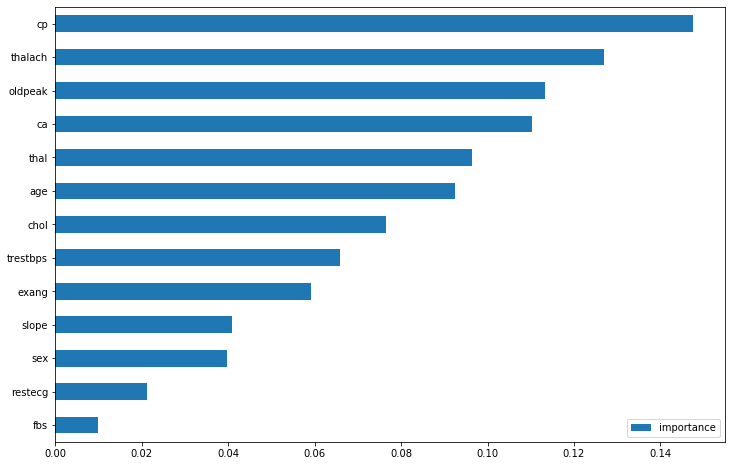

In [63]:
imp = pd.DataFrame(clf_rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [71]:
import seaborn as sns

sns.set_color_codes("muted")
sns.barplot(x=clf_rf.feature_importances_, y=x_train.columns, data=data,
            label="importance", color="b")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [70]:
x_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')